Please choose a Dx-Dy sensivity:
 1- Dx-Dy = 0.1
 2- Dx-Dy = 0.2
 3- Dx-Dy = 1
 4- Dx-Dy = 10
 
1

Iteration has started!

Convergence reached after 1013 iterations.


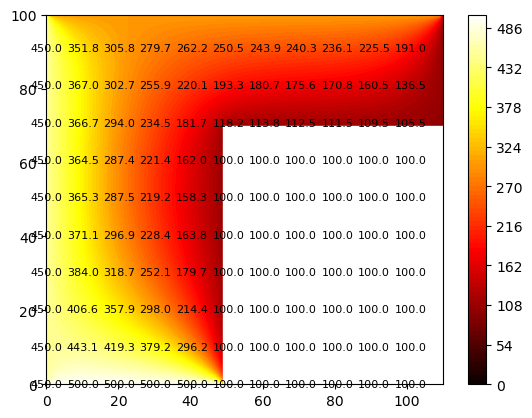

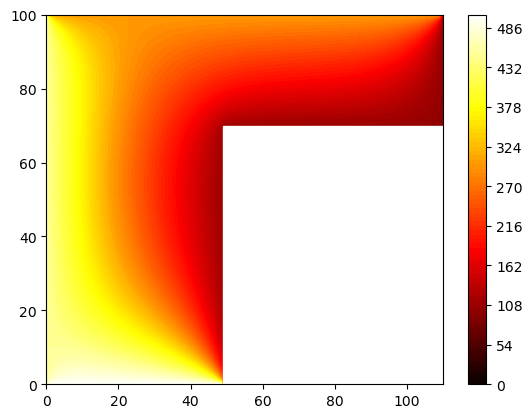

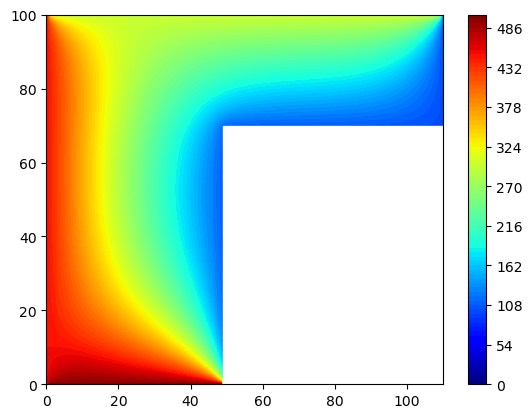

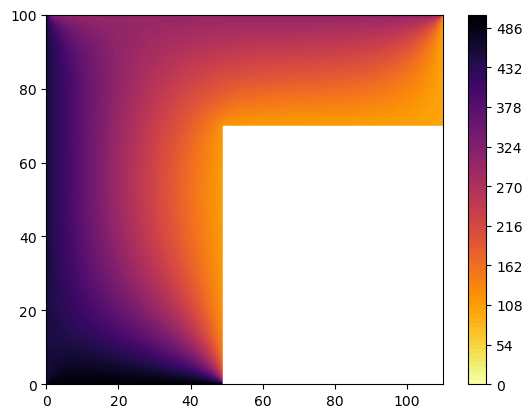

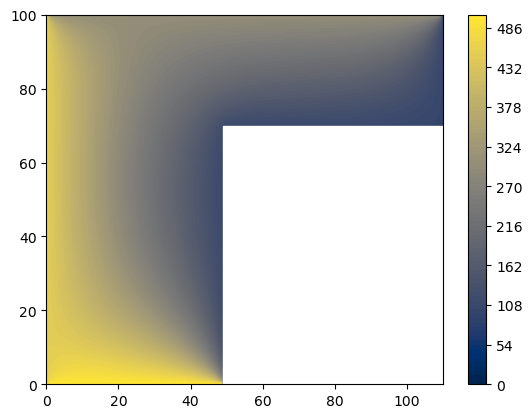

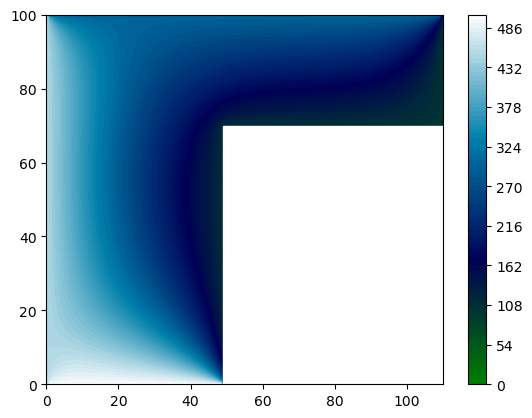

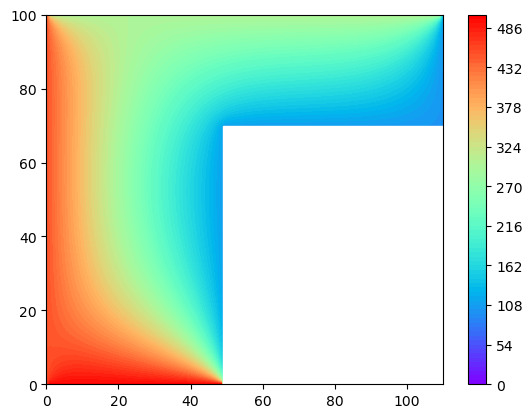

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, patches
from matplotlib.patches import Rectangle

x_plate = 110
y_plate = 100
iteration_t = 2000
delta = 1
xy_delta = [0.1,0.2,1,10] #Dx-Dy size scenarios
x = int(input("Please choose a Dx-Dy sensivity:\n 1- Dx-Dy = 0.1\n 2- Dx-Dy = 0.2\n 3- Dx-Dy = 1\n 4- Dx-Dy = 10\n \n"))
tolerance = xy_delta[x-1] # Temperature change threshold for stopping iteration

n1, n2 = (x_plate, y_plate)
dimX = np.linspace(0, x_plate, n1)
dimY = np.linspace(0, y_plate, n2)
X, Y = np.meshgrid(dimX, dimY, indexing='ij')
T = np.empty((x_plate, y_plate))

Dx = 100
Dy = 100
k = 52  # Commercial-Bronze (%90 Cu, %10Al)
h1 = 5
h2 = 25

Tinf1 = 450
Tinf2 = 100
T_top = 300.0
T_left = 450.0
T_bottom = 500.0
T_right = 100.0
T_conv = 100.0

T[:, -1] = T_top  # top line of the plt.
T[:49, 0] = T_bottom  # bottom  line of the plt.
T[0, :] = T_left  # left line of the plt.
T[-1, :] = T_right  # right line of the plt.
T[50:, :69] = T_conv

print("\nIteration has started!\n")
for iteration in range(iteration_t):
    prev_T = T.copy()  # Store previous iteration temperatures
    max_change = 0.0  # Track maximum temperature change in this iteration

    for i in range(1, x_plate - 1, delta):
        for j in range(1, y_plate - 1, delta):
            if i > 49 and j < 69:
                ++i and --j
            elif i == 49 and j == 69:  # Node 42, for right inner corner
                T[i, j] = (k * (Dx / Dy) * T[i][j + 1] + k * (Dy / Dx) * T[i - 1][j] + (k / 2) * (Dx / Dy) * T[i][
                    j - 1] + (k / 2) * (Dy / Dx) * T[i + 1][j] + (h2 / 2) * (Dx + Dy) * Tinf2) / (
                                  ((3 * k) / 2) * ((Dx / Dy) + (Dy / Dx)) + (h2 / 2) * (Dx + Dy))
            elif i == 49 and j == 0:  # Node 90, right lower corner
                T[i, j] = ((k * (Dy / Dx)) * T[i - 1][j] + (k * (Dx / Dy)) * T[i][j + 1] + h2 * Dy * Tinf2) / (
                                  k * ((Dx / Dy) + (Dy / Dx)) + h2 * Dy)
            elif i == -1 and j == -30:  # Node 45, right iso lower point . should be update the equation
                T[i, j] = (((h2 / 2) * (Dy / Dx)) * T[i - 1][j] + ((k / 2) * (Dy / Dx)) * T[i + 1][j] + (
                            k * (Dx / Dy)) * T[i][j + 1] + (h2 * Dx * Tinf2))
            elif i == -1 and j == -1:  # Node 12, right upper iso corner . should be update the equation
                T[i, j] = ((Dy / Dx) * T[i - 1][j] + (Dx / Dy) * T[i][j - 1]) / ((Dy / Dx) + (Dx / Dy))
            elif i == 0:  # Node 55, left wall
                if j == -1:  # For node 1, left upper corner
                    T[i, j] = (((h2 / 2) * (Dy / Dx)) * T[i - 1][j] + ((k / 2) * (Dy / Dx)) * T[i + 1][j] + (
                                k * (Dx / Dy)) * T[i][j + 1] + (h2 * Dx * Tinf2))
                elif j == 0:  # For node 2, left lower corner
                    T[i, j] = (k * ((Dy / Dx) * T[i + 1][j] + (Dx / Dy) * T[i][j - 1]) + h1 * Dy * Tinf1) / (
                                  k * ((Dy / Dx) + (Dx / Dy)) + h1 * Dy)
                else:
                    T[i, j] = ((k / 2) * (Dx / Dy) * (T[i][j + 1] + T[i][j - 1]) + k * (Dy / Dx) * T[i + 1][
                        j] + h1 * Dy * Tinf1) / (k * ((Dx / Dy) + (Dy / Dx)) + h1 * Dy)
            else:
                T[i, j] = 0.25 * (T[i + 1][j] + T[i - 1][j] + T[i][j + 1] + T[i][j - 1])  # For inner nodes

            # Calculate temperature change in current iteration
            change = abs(T[i, j] - prev_T[i, j])
            if change > max_change:
                max_change = change

    # Check if the maximum temperature change is below the threshold
    if max_change < tolerance:
        print(f"Convergence reached after {iteration+1} iterations.")
        break

# Arranging colorbar and showing results
colorinterpolation = 90
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ContourPlot=plt.contourf(X, Y, T, colorinterpolation, cmap=plt.get_cmap('hot'))
ColorBar = fig.colorbar(ContourPlot)
rect1 = patches.Rectangle((49,0), 61, 70, color="white")
ax.add_patch(rect1)

step = 10  # Step size for selecting grid points
fontsize = 8
for i in range(0, x_plate, step):
    for j in range(0, y_plate, step):
        plt.text(dimX[i], dimY[j], f'{T[i, j]:.1f}', color='black', ha='center', va='center', fontsize=fontsize)
plt.show()

#Different color maps for better visualization
color_maps = ["hot","jet","inferno_r","cividis","ocean","rainbow"]

for i in color_maps:
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ContourPlot = plt.contourf(X, Y, T, colorinterpolation, cmap=i)
    ColorBar = fig.colorbar(ContourPlot)
    rect1 = patches.Rectangle((49,0), 61, 70, color="white")
    ax.add_patch(rect1)
    plt.show()

Please choose a Dx-Dy sensivity:
 1- Dx-Dy = 0.1
 2- Dx-Dy = 0.2
 3- Dx-Dy = 1
 4- Dx-Dy = 10
 
2

Iteration has started!

Convergence reached after 688 iterations.


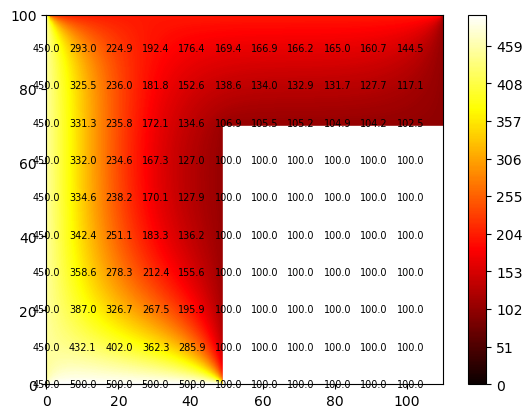

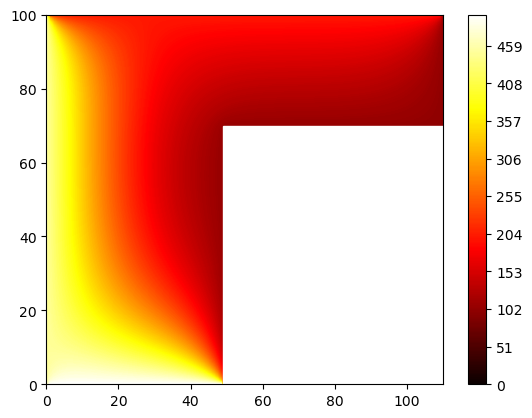

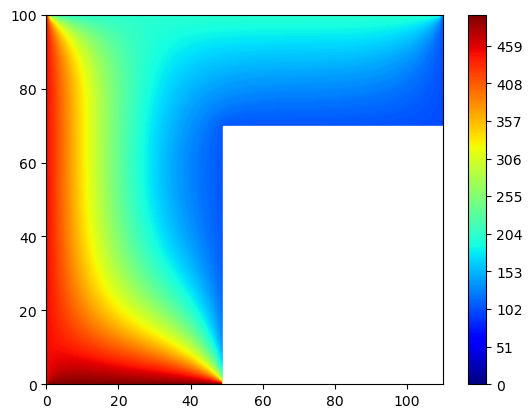

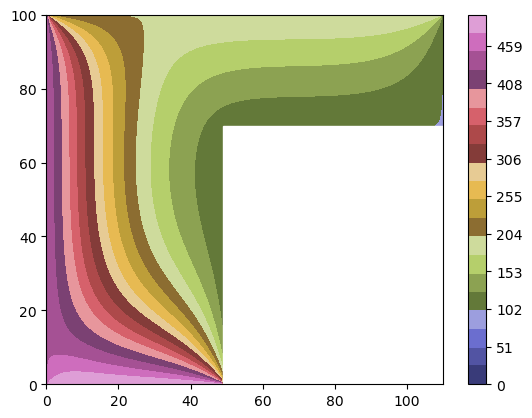

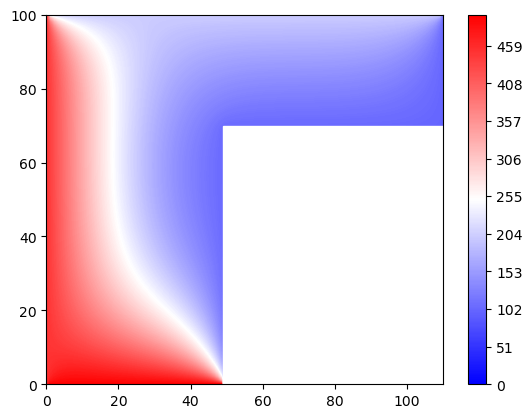

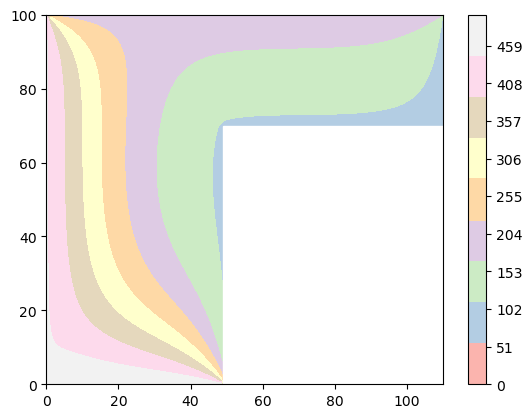

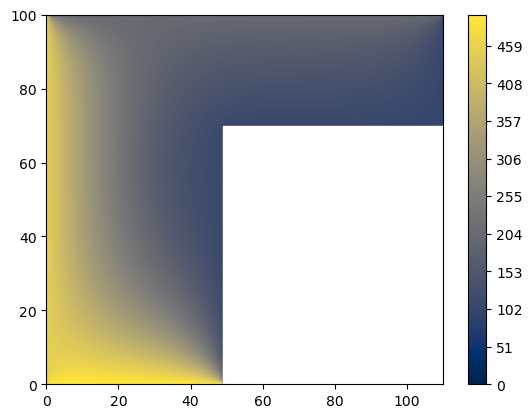

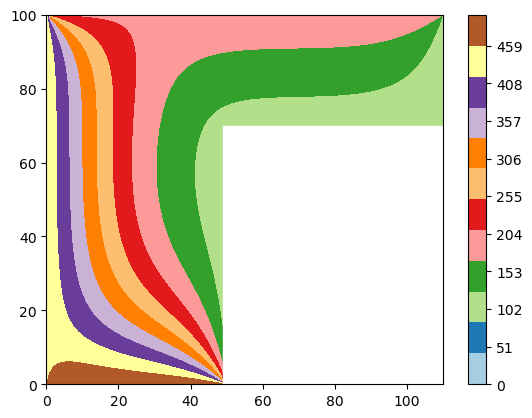

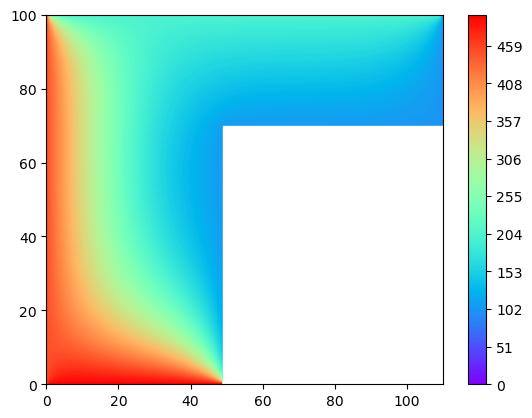

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, patches
from matplotlib.patches import Rectangle

x_plate = 110
y_plate = 100
iteration_t = 100000
delta = 1
xy_delta = [0.1,0.2,1,10] #Dx-Dy size scenarios
x = int(input("Please choose a Dx-Dy sensivity:\n 1- Dx-Dy = 0.1\n 2- Dx-Dy = 0.2\n 3- Dx-Dy = 1\n 4- Dx-Dy = 10\n \n"))
tolerance = xy_delta[x-1] # Temperature change threshold for stopping iteration

n1, n2 = (x_plate, y_plate)
dimX = np.linspace(0, x_plate, n1)
dimY = np.linspace(0, y_plate, n2)
X, Y = np.meshgrid(dimX, dimY, indexing='ij') #for mapping-plotting
T = np.empty((x_plate, y_plate))

Dx = 1000
Dy = 1000
h1 = 5
h2 = 25
k = 52  # Commercial-Bronze (%90 Cu, %10Al)

Tinf1 = 450
Tinf2 = 100
T_top = 200.0
T_left = 450.0
T_bottom = 500.0
T_right = 100.0
T_conv = 100.0

T[:, -1] = T_top  # top line of the plate
T[:49, 0] = T_bottom  # bottom  line of the plate
T[0, :] = T_left  # left line of the plate
T[-1, :] = T_right  # right line of the plate
T[50:, :69] = T_conv #the right side with convection

print("\nIteration has started!\n")
for iteration in range(iteration_t):
    prev_T = T.copy()  # Store previous iteration temperatures
    max_change = 0.0  # Track maximum temperature change in this iteration

    for i in range(1, x_plate - 1, delta):
        for j in range(1, y_plate - 1, delta):
            if i > 49 and j < 69:
                ++i and --j
            elif i == 49 and j == 69:  # Node 42, for right inner corner
                T[i, j] = (k * (Dx / Dy) * T[i][j + 1] + k * (Dy / Dx) * T[i - 1][j] + (k / 2) * (Dx / Dy) * T[i][
                    j - 1] + (k / 2) * (Dy / Dx) * T[i + 1][j] + (h2 / 2) * (Dx + Dy) * Tinf2) / (
                                  ((3 * k) / 2) * ((Dx / Dy) + (Dy / Dx)) + (h2 / 2) * (Dx + Dy))
            elif i == 49 and j == 0:  # Node 90, right lower corner
                T[i, j] = ((k * (Dy / Dx)) * T[i - 1][j] + (k * (Dx / Dy)) * T[i][j + 1] + h2 * Dy * Tinf2) / (
                                  k * ((Dx / Dy) + (Dy / Dx)) + h2 * Dy)
            elif i == -1 and j == -30:  # Node 45, right iso lower point . should be update the equation
                T[i, j] = (((h2 / 2) * (Dy / Dx)) * T[i - 1][j] + ((k / 2) * (Dy / Dx)) * T[i + 1][j] + (
                            k * (Dx / Dy)) * T[i][j + 1] + (h2 * Dx * Tinf2))
            elif i == -1 and j == -1:  # Node 12, right upper iso corner . should be update the equation
                T[i, j] = ((Dy / Dx) * T[i - 1][j] + (Dx / Dy) * T[i][j - 1]) / ((Dy / Dx) + (Dx / Dy))
            
            elif i == 0:  # Node 55, left wall
                if j == -1:  # For node 1, left upper corner
                    T[i, j] = (((h2 / 2) * (Dy / Dx)) * T[i - 1][j] + ((k / 2) * (Dy / Dx)) * T[i + 1][j] + (
                                k * (Dx / Dy)) * T[i][j + 1] + (h2 * Dx * Tinf2))
                elif j == 0:  # For node 2, left lower corner
                    T[i, j] = (k * ((Dy / Dx) * T[i + 1][j] + (Dx / Dy) * T[i][j - 1]) + h1 * Dy * Tinf1) / (
                                  k * ((Dy / Dx) + (Dx / Dy)) + h1 * Dy)
                else:
                    T[i, j] = ((k / 2) * (Dx / Dy) * (T[i][j + 1] + T[i][j - 1]) + k * (Dy / Dx) * T[i + 1][
                        j] + h1 * Dy * Tinf1) / (k * ((Dx / Dy) + (Dy / Dx)) + h1 * Dy)
            else:
                T[i, j] = 0.25 * (T[i + 1][j] + T[i - 1][j] + T[i][j + 1] + T[i][j - 1])  # For inner nodes

                
            # Calculate temperature change in current iteration
            change = abs(T[i, j] - prev_T[i, j])
            if change > max_change:
                max_change = change

    # Check if the maximum temperature change is below the threshold
    if max_change < tolerance:
        print(f"Convergence reached after {iteration+1} iterations.")
        break

# Arranging colorbar and showing results
colorinterpolation = 400
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ContourPlot=plt.contourf(X, Y, T, colorinterpolation, cmap=plt.get_cmap('hot'))
ColorBar = fig.colorbar(ContourPlot)
rect1 = patches.Rectangle((49,0), 61, 70, color="white")
ax.add_patch(rect1)

step = 10  # Step size for selecting grid points
fontsize = 7
for i in range(0, x_plate, step):
    for j in range(0, y_plate, step):
        plt.text(dimX[i], dimY[j], f'{T[i, j]:.1f}', color='black', ha='center', va='center', fontsize=fontsize)
plt.show()

#Different color maps for better visualization
color_maps = ["hot","jet","tab20b","bwr","Pastel1","cividis","Paired","rainbow"]

for i in color_maps:
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ContourPlot = plt.contourf(X, Y, T, colorinterpolation, cmap=i)
    ColorBar = fig.colorbar(ContourPlot)
    rect1 = patches.Rectangle((49,0), 61, 70, color="white")
    ax.add_patch(rect1)
    plt.show()